In [ ]:
'''

Моделирование распределения Бозе-Эйнштейна в идеальном бозе-газе

Программа визуализирует зависимость доли частиц в основном состоянии (`<N_gr>/N`) от безразмерного параметра `kT/E` для идеального бозе-газа в трёхмерном кубическом ящике.

Физическая модель
- Система: невзаимодействующие бозоны в кубической области с периодическими граничными условиями
- Энергетические уровни: `E = (i² + j² + k²) * E_0`, где `i,j,k` — целые числа
- Параметры:
  - `N_gr` — число частиц в основном состоянии
  - `N` — полное число частиц (фиксировано как `N = 100`)
  - `kT/E` — отношение тепловой энергии к характерной энергии системы
  
Автор: Daria Zholnirova 
Дата: апрель 2025 

'''

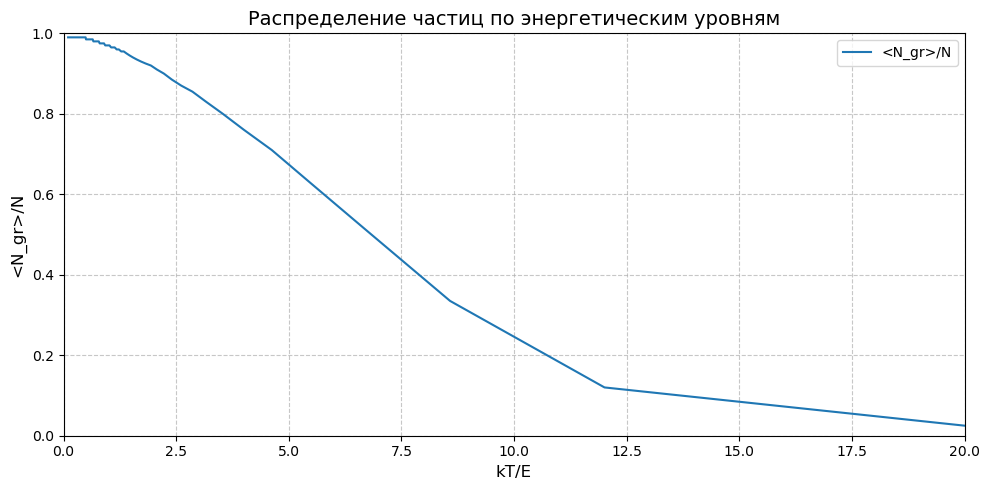

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления общего числа частиц
def calculate_N(bE, N_gr, size=30):
    i, j, k = np.indices((size, size, size))
    x = bE * (i**2 + j**2 + k**2)
    with np.errstate(over='ignore'):
        return np.sum(1 / (np.exp(x) * (1 + 1/N_gr) - 1))

# Рассчеты
bE_mass = np.linspace(0.05, 10, 300)
N_gr_mass = []
total = len(bE_mass)
for idx, bE in enumerate(bE_mass):
    N_gr = 1.0
    while True:                  # цикл для ускорения счета
        current_N = calculate_N(bE, N_gr)
        if abs(current_N - 100) < 1:
            break
        N_gr += 0.5
    N_gr_mass.append(N_gr)

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(1 / bE_mass, np.array(N_gr_mass) / 100, label='<N_gr>/N') 
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.xlabel('kT/E', fontsize=12)
plt.ylabel('<N_gr>/N', fontsize=12)
plt.title('Распределение частиц по энергетическим уровням', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Сохранение и отображение
plt.tight_layout()
plt.savefig('graph.png', dpi=300)
plt.show()